#Decision Tree Theoretical Questions

####1. **What is a Decision Tree, and how does it work ?**

**Answer:**
A Decision Tree is a supervised machine learning algorithm used for both classification and regression. It splits the dataset into subsets based on the value of input features. This process continues recursively to form a tree structure where each internal node represents a feature, each branch a decision rule, and each leaf a final output or label.

---

####2. **What are impurity measures in Decision Trees ?**

**Answer:**
Impurity measures indicate the degree of heterogeneity in the target values at a node. Common impurity measures include:

* **Gini Impurity**
* **Entropy (Information Gain)**
  These are used to evaluate how good a split is — the lower the impurity, the better the split.

---

####3. **What is the mathematical formula for Gini Impurity ?**

**Answer:**
$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

Where $p_i$ is the probability of a data point belonging to class $i$, and $n$ is the number of classes.

---

####4. **What is the mathematical formula for Entropy ?**

**Answer:**
$$
Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

Where $p_i$ is the proportion of class $i$ in the dataset. Higher entropy means more disorder.

---

####5. **What is Information Gain, and how is it used in Decision Trees ?**

**Answer:**
Information Gain is the reduction in entropy or impurity from splitting a node. It is calculated as:

$$
IG = Entropy(parent) - \sum_{j} \frac{n_j}{n} \cdot Entropy(child_j)
$$

It helps in selecting the feature that best splits the dataset at each step.

---

####6. **What is the difference between Gini Impurity and Entropy ?**

**Answer:**
* **Gini Impurity** is generally faster to compute and focuses on misclassification.
* **Entropy** uses logarithms and captures more information but is computationally heavier.
  Both serve a similar purpose in decision trees — measuring the quality of splits.

---

####7. **What is the mathematical explanation behind Decision Trees ?**

**Answer:**
Mathematically, a decision tree recursively partitions the feature space to minimize a loss function:

* For classification: impurity (Gini or Entropy)
* For regression: mean squared error
  The optimal split maximizes Information Gain or minimizes impurity at each node.

---

####8. **What is Pre-Pruning in Decision Trees ?**

**Answer:**
Pre-pruning stops the tree from growing once a certain condition is met (e.g., max depth, min samples). This helps prevent overfitting by restricting complexity during training.

---

####9. **What is Post-Pruning in Decision Trees ?**

**Answer:**
Post-pruning first grows the full tree and then prunes back unnecessary branches using a validation set or cost complexity pruning. It removes overfitting after the tree has been fully constructed.

---

####10. **What is the difference between Pre-Pruning and Post-Pruning ?**

**Answer:**
* **Pre-Pruning:** Halts growth early using constraints.
* **Post-Pruning:** Trims a fully grown tree.
  Pre-pruning is more efficient, while post-pruning can often yield better generalization.

---

####11. **What is a Decision Tree Regressor ?**

**Answer:**
A Decision Tree Regressor predicts continuous numeric values by learning decision rules from the features. It splits data based on minimizing the variance or Mean Squared Error at each node.

---

####12. **What are the advantages and disadvantages of Decision Trees ?**

**Answer:**
**Advantages:**

* Easy to interpret
* Handles both numerical and categorical data
* Requires little data preprocessing

**Disadvantages:**

* Prone to overfitting
* Can be biased with imbalanced data
* Instable to small data variations

---

####13. **How does a Decision Tree handle missing values ?**

**Answer:**
Decision Trees can handle missing values by:

* Ignoring the instance or using surrogate splits
* Imputing missing values during preprocessing
* Using probability-based decisions when splitting

---

####14. **How does a Decision Tree handle categorical features ?**

**Answer:**
Categorical features can be:

* Directly split based on category equality
* Encoded using label encoding or one-hot encoding
  Some implementations (like CART) require categorical features to be encoded numerically.

---

####15. **What are some real-world applications of Decision Trees ?**

**Answer:**
* Medical diagnosis (predicting diseases)
* Financial risk assessment
* Customer churn prediction
* Fraud detection
* Recommendation systems
* Loan approval systems

---

In [1]:
##Practical Questions
#16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
#17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

print("Feature Importances:", model.feature_importances_)

Feature Importances: [0.         0.01667014 0.90614339 0.07718647]


In [3]:
#18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [4]:
#19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.49088814174830425


In [32]:
#20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree", view=True)

'iris_tree.pdf'

In [25]:
#21. Train a Decision Tree Classifier with a max depth of 3 and compare its accuracy with a fully grown tree.

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define bins and labels
bins = np.linspace(y_train.min() - 1, y_train.max() + 1, num=4)  # 3 classes
labels = [0, 1, 2]

# Convert continuous targets to classes
y_train_class = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True).astype(int)
y_test_class = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True).astype(int)

# Train fully grown classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_class)

# Train limited depth classifier
model_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
model_limited.fit(X_train, y_train_class)

# Predict and evaluate
y_pred_limited = model_limited.predict(X_test)
y_pred_full = model.predict(X_test)

print("Accuracy (max_depth=3):", accuracy_score(y_test_class, y_pred_limited))
print("Accuracy (fully grown):", accuracy_score(y_test_class, y_pred_full))

Accuracy (max_depth=3): 1.0
Accuracy (fully grown): 1.0


In [24]:
#22. Train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with the default tree.

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are defined

min_val = y_train.min()
max_val = y_train.max()

bins = np.linspace(min_val - 1, max_val + 1, num=4)  # 3 bins
labels = [0, 1, 2]

y_train_class = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True).astype(int)
y_test_class = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True).astype(int)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_class)

model_custom = DecisionTreeClassifier(min_samples_split=5, random_state=42)
model_custom.fit(X_train, y_train_class)

print("Accuracy (min_samples_split=5):", accuracy_score(y_test_class, model_custom.predict(X_test)))
print("Accuracy (default):", accuracy_score(y_test_class, model.predict(X_test)))

Accuracy (min_samples_split=5): 1.0
Accuracy (default): 1.0


In [22]:
#23. Apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset once, unscaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on unscaled data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print("Accuracy without scaling:", accuracy_score(y_test, model.predict(X_test)))

# Now scale data: fit scaler only on training data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)  # scale test data using the same scaler

# Train on scaled data
model_scaled = DecisionTreeClassifier(random_state=42)
model_scaled.fit(X_train_s, y_train)
print("Accuracy with scaling:", accuracy_score(y_test, model_scaled.predict(X_test_s)))

Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [21]:
#24. Train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

import numpy as np
import pandas as pd

# Example: Suppose y_train is continuous, you can bin it into classes like this:
bins = [0, 1.5, 3.0, 5.0]  # define bin edges according to your data range
labels = [0, 1, 2]  # class labels for the bins

# Convert continuous targets into categorical classes
y_train_binned = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True).astype(int)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True).astype(int)

# Now use y_train_binned and y_test_binned for classification
ovr_model = OneVsRestClassifier(DecisionTreeClassifier())
ovr_model.fit(X_train, y_train_binned)

print("OvR Accuracy:", accuracy_score(y_test_binned, ovr_model.predict(X_test)))

OvR Accuracy: 1.0


In [20]:
#25. Train a Decision Tree Classifier and display the feature importance scores.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load Iris dataset — classification problem with discrete class labels
iris = load_iris()
X = iris.data
y = iris.target  # y must be discrete classes: 0, 1, 2

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Display feature importance
print("Feature Importances:")
for name, importance in zip(iris.feature_names, model.feature_importances_):
    print(f"{name}: {importance:.4f}")

Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0167
petal length (cm): 0.4059
petal width (cm): 0.5774


In [11]:
#26. Train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

regressor_limited = DecisionTreeRegressor(max_depth=5)
regressor_limited.fit(X_train, y_train)

print("MSE (max_depth=5):", mean_squared_error(y_test, regressor_limited.predict(X_test)))
print("MSE (unrestricted):", mean_squared_error(y_test, regressor.predict(X_test)))

MSE (max_depth=5): 0.5245146178314735
MSE (unrestricted): 0.49088814174830425


ccp_alpha = 0.00000, Accuracy = 1.0000
ccp_alpha = 0.00810, Accuracy = 1.0000
ccp_alpha = 0.01111, Accuracy = 1.0000
ccp_alpha = 0.01111, Accuracy = 1.0000
ccp_alpha = 0.01622, Accuracy = 1.0000
ccp_alpha = 0.02412, Accuracy = 0.9667
ccp_alpha = 0.24327, Accuracy = 0.6333
ccp_alpha = 0.33340, Accuracy = 0.3000


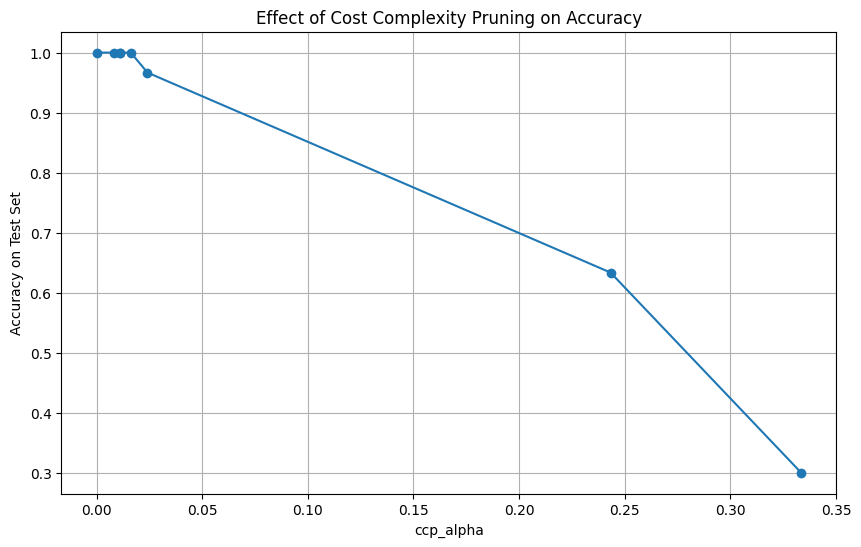

In [19]:
#27. Train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load a classification dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ensure it's categorical: 0, 1, 2

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train initial classifier to obtain CCP alphas
model = DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train classifiers for each ccp_alpha and record accuracy
accuracies = []
models = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    accuracies.append(acc)
    models.append(clf)
    print(f"ccp_alpha = {alpha:.5f}, Accuracy = {acc:.4f}")

# Plot accuracy vs ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracies, marker='o', linestyle='-')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy on Test Set')
plt.title('Effect of Cost Complexity Pruning on Accuracy')
plt.grid(True)
plt.show()

In [18]:
#28. Train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Iris dataset (for classification)
iris = load_iris()
X = iris.data
y = iris.target  # Ensure labels are discrete (0, 1, 2)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using classification metrics
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))

Precision (macro): 1.0
Recall (macro): 1.0
F1-Score (macro): 1.0


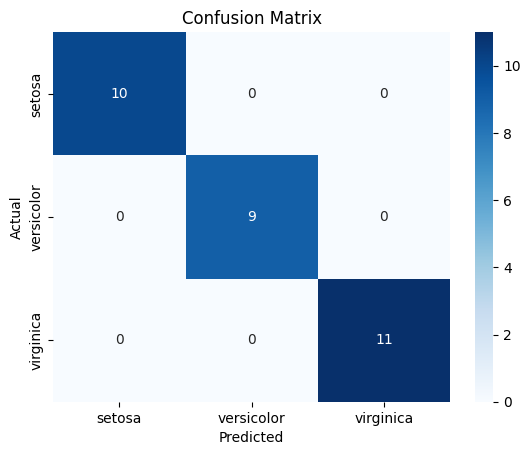

In [17]:
#29. Train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ensure these are discrete classes

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
#30. Train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Load classification dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ensure y is categorical (0, 1, 2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output best results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9500
